<a href="https://colab.research.google.com/github/ribeirolucas962/DESAFIO-7/blob/main/desafio_7_dnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELO DE ANÁLISE DADOS E METRICAS RFM
 ## Introdução
###Analisando a base de dados de clientes, produtos e transações da empresa de e-commerce para entender melhor o comportamento do cliente e personalizar as campanhas de marketing. Foi disponibilizado uma base dados em csvcontendo varias informaçoes dos clientes, ptoduto, e transaçoes realizadas entre 2010-12-01 Ate: 2011-12-09.

#Objetivo do projeto
###Desenvolver um modelo de Machine Learning de Clusterização para analisar as métricas RFM (Recência, Frequência e Valor Monetário) dos clientes da empresa, agrupando-os em clusters com base em seu comportamento de compra.

##Metodologia

Aquisição e pré-processamento dos dados:
Coleta da base de dados de clientes com informações sobre suas compras (data, valor, etc.).
Limpeza e tratamento dos dados para garantir a qualidade da análise.
Seleção e aplicação do algoritmo de clustering:
Escolha do algoritmo de clustering mais adequado para o tipo de dados e objetivos do projeto.
Treinamento do modelo de clustering na base de dados pré-processada.
Análise dos resultados:
Identificação dos clusters formados e suas características principais.
Interpretação dos padrões de comportamento de compra em cada cluster.
Aplicação da segmentação de clientes:
Definição de ações de marketing personalizadas para cada cluster de clientes.
Desenvolvimento de campanhas direcionadas e otimizadas para cada segmento.

##Benefícios para a empresa

Melhor compreensão do comportamento dos clientes:
Identificação de grupos de clientes com características e necessidades distintas.
Percepção dos padrões de compra em cada cluster.
Segmentação mais precisa dos clientes:
Criação de campanhas de marketing personalizadas para cada segmento.
Aumento da relevância das ofertas e promoções para cada grupo de clientes.
Otimização das campanhas de marketing:
Maior retorno sobre investimento (ROI) em campanhas direcionadas.
Aumento da eficiência na comunicação com os clientes.

##Origem dos Dados

Empresa multinacional com operações em 38 países.
Mais de 4.000 clientes únicos.
Mais de 540.000 transações.

##Colunas do Dataset

InvoiceNo: Identificador único da transação.

StockCode: Código de estoque do produto.

Description: Descrição completa do produto.

Quantity: Quantidade de unidades do produto vendidas na transação.

InvoiceDate: Data da transação (formato dd/mm/aaaa).

UnitPrice: Preço unitário do produto na transação.

CustomerID: Identificador único do cliente.

Country: País de origem da transação.

#Bibliotecas usada durante o Análise

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer
import chardet
import plotly.graph_objects as go

##Feito pip install da biblioteca chardet e usada para detectar a codificação de caracteres do conteúdo do arquivo.

#Análise exploratória dos dados

In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')

###Observação da base de dados

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


###Avaliando o período de coletas dos dados

In [ ]:
inicio = pd.to_datetime(df['InvoiceDate']).dt.date.min()
fim = pd.to_datetime(df['InvoiceDate']).dt.date.max()
print('Periodo dos dados - De:', inicio, 'Ate:', fim)

Periodo dos dados - De: 2010-12-01 Ate: 2011-12-09


###Verificando o Data Frame para ver a quantidade nulos usando .sum

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Feito um for para mostrar os valores distintos

In [ ]:
valores_unicos = []
for col in df.columns[0:24].tolist():
    print(col, ':', len(df[col].astype(str).value_counts()))
    valores_unicos.append(len(df[col].astype(str).value_counts()))

InvoiceNo : 25900
StockCode : 4070
Description : 4224
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4373
Country : 38


In [ ]:
df['InvoiceNo'].sort_values()

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 541909, dtype: object

In [ ]:
df['StockCode'].sort_values()

160128           10002
6166             10002
75792            10002
63082            10002
76571            10002
              ...     
42057     gift_0001_50
178556    gift_0001_50
245516    gift_0001_50
239744    gift_0001_50
40383                m
Name: StockCode, Length: 541909, dtype: object

# ##Convertendo Para data a coluna InovoiceNO

###Para ambas as colunas percebe-se a ocorrência de caracteres alfabéticos em alguns dos códigos, ou seja, dados do tipo string, texto. Por isso estas colunas são do tipo object. Como elas representam códigos (conforme descrito anteriormente na sessão 'Sobre os dados' deste notebook), então optou-se por mantê-las desta forma.

###Outro ponto importante é que a coluna 'InvoiceDate' apresenta informações de data e horário das transações, contudo ela está com dados do tipo 'object'. Desta forma, é necessário convertê-los para dados do tipo data (datetime). Para isso, realizou-se o código abaixo.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#verificando após converter a coluna(InvoiceDate).

In [ ]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

#Analizando os dados da coluna "Description"

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

##Conforme descrito anteriormente a coluna 'Description' a qual a descrição de produtos, tem 4223 produto diferente vendidos.

In [ ]:
df['Description'].nunique()

4223

##Avaliando a distribuição dos da coluna "Country", uma plotagem de um gráfico de barras, ordenadas do maior para o menor mostrando a frequências de cada pais.

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(
            x=df['Country'].value_counts(normalize=True, ascending=True),
            y=df['Country'].value_counts(normalize=True, ascending=True).index,
            orientation='h',
            name='Frequency'
        )
    ]
)

fig.update_layout(
    title='Frequência de cada um dos países nas transações do e-commerce',
    xaxis_title='Frequência no dataset em %',
    yaxis_title='Países',
    height=800,
    width=1200,
    font=dict(size=14),
    showlegend=False
)

fig.show()

##Analisando o gráfico de barras logo a cima, a maioria das vendas foi feita no Reino Unido.


In [ ]:
df['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

## Portanto o Reino Unido tem ao todo 495478 casos de transações, fazendo a comparação com mais 4 países ele representa uma parte muito grande de vendas. Agora mostra esses dados em porcentagem.

In [ ]:
Qtd_relativa = (df['Country'].value_counts().head(4).sum())/(df.shape[0])
print(f'{Qtd_relativa:.2%}')

96.28%


###Agora analisando as estatística descritiva das colunas numérias presente exceto a coluna "CustomerID", ela representa a identificação do cliente.
###Atenção ambas colunas esta negativa, no tanto sentido tratá-las devido falarem de informações a respeito da quantidade de produtos vendidos e preço de produtos unitários. Esse problema deverá se tratado antes da modelagem.
###Segundo ponto de atenção importante: outliers. Ambas as colunas apresentam outliers claros, visto que os valores máximos encontrados em cada uma delas é bem maior do que o terceiro quartil (75% dos dados).

###Ambos estes problemas, juntamente com o tratamento de dados nulos, serão abordados na sessão seguinte "Data Preparation".


In [ ]:
df.drop(columns=['CustomerID']).describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#Data Preparation

##Dados nulos

##Ao analisar os dados percebi que tem muitos nulos na coluna "Description" e na coluna "CustomerID" será exibida com clareza, mostrando com detalhes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
def missing_data(df):

  missing_df = (
    df.isnull().sum().to_frame('missing_count')
    .join(((df.isnull().sum())/df.shape[0]).to_frame('missing_pct'))
  )

  return missing_df.style.format('{:.2%}', subset = 'missing_pct')

In [ ]:
missing_data(df)

,missing_count,missing_pct
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,1454,0.27%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,135080,24.93%
Country,0,0.00%


##Tendo-se uma conclusão de uma quantidade de dados nulos na coluna"Description" com uma faixa de 0.27%, e um valor bem pequeno. Porem na coluna " CustomerID" tem um total de 24,93% de nulos.Esta quantidade pode ser considerada alta. O grande "X" da questão neste caso é que não existem mais informações a respeito destes clientes com código de identificam nulo. Não se sabe se foi um erro de preenchimento ao cadastrar o cliente, ou se tem algum outro porém. O ideal neste caso seria conversar com a empresa para entender de forma tratar isto.

##Drop da coluna 'CustomerID'

In [ ]:
df=df.dropna(subset=['CustomerID'])

##Verificando a quantidade de nulos no dataset depois de drop.
## Ao analisar depois do dropna feito da coluna 'CustomerID', foi excluído também as linhas da coluna 'Description'. Porem agora não apresenta mais dados nulos.

In [ ]:
missing_data(df)

,missing_count,missing_pct
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,0,0.00%
Country,0,0.00%


##Antes de seguir com a análise seguinte, optou-se por transformar os dados da coluna "CustomerID", pois, conforme visto anteriormente, tem dados de identificação dos clientes, ou seja, códigos. Logo, estes não precisam ser dados do tipo "float" e sim "int".

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


#Linhas duplicadas
##Avaliando a existência de linhas duplicadas no dataset e fazendo a soma.

In [ ]:
df.duplicated().sum()

5225

##Existe 5225 linhas duplicada no do dataset, imprimindo algumas para o análise.

In [ ]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [ ]:
df_duplicated[df_duplicated['CustomerID']==17908]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom


##Fazendo o analise de um clinte especifico.

## Portanto, estes casos de linhas duplicadas podem ter sido gerados por algum tipo de erro do sistema, pois não faz sentido o mesmo cliente ter comprado o mesmo produto na mesma hora e ter sido gerado o mesmo código de transação e o mesmo código de estoque duas vezes.
##Foi optado a exclusão das duplicadas.

In [ ]:
df=df.drop_duplicates()

##Resultado do drop das linhas duplicadas

In [ ]:
df.duplicated().sum()

0

#Dados negativos da coluna 'Quantity e UnitPrice'

###Realizando o tratamento, porem antes devemos filtrar o dataset original, para selecionar as linhas com dados de quantidade e preço unitário.

In [ ]:
df = df[(df['Quantity']>0)&(df['Quantity']>0)]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#Outliers
##Utilizando o boxplot para verificar outliers

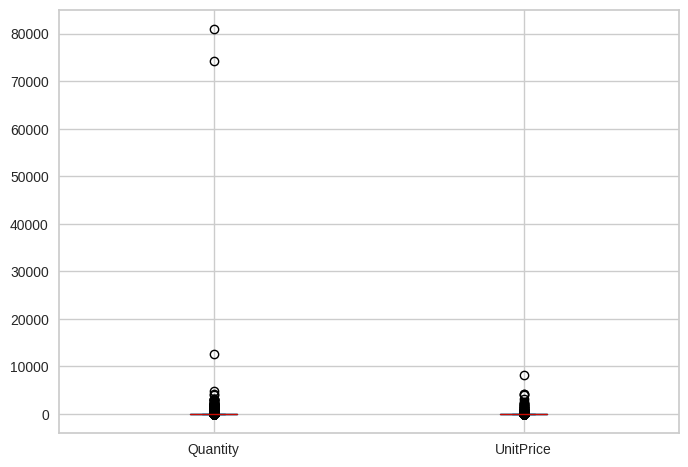

In [ ]:
df[['Quantity', 'UnitPrice']].plot.box();

##Na utilização do grafico foi bercebido bem claro alguns outliers na coluna 'Quantity'.

In [ ]:
df[df['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


##Fazendo uma filtragem para plotar um gráfico Boxplot somente dos casos com quantidade de produto vendido menor que 10.000.

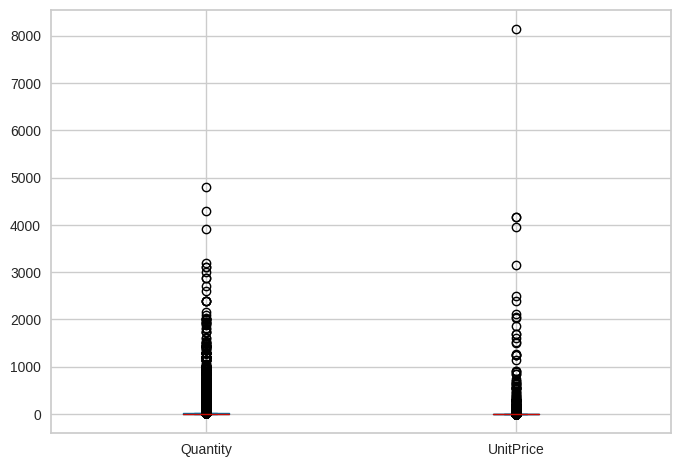

In [ ]:
df[df['Quantity']<10000][['Quantity', 'UnitPrice']].plot.box();

##Verificando os outliers na coluna 'UnitPrice'

In [ ]:
df[df['UnitPrice']>8000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


##Visto com essa análise de algumas colunas percebemos que os modelos de clusterização são sensíveis a outliers, opto-se por excluir todos eles.

##casos que os produtos vendidos acima de 10.0000 de única venda.caso que os produtos vendidos a cima de 8.000 de úncia venda.

## e um processo de exclusão será filtrado o dataset original.

In [ ]:
df = df[(df['Quantity']<1000)&(df['UnitPrice']<8000)]

#Cálculo da coluna de valor total.
##Fazer o calculo da coluna total e a multiplicação de quantidade de produtos pelo preço unitário por produto.

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df

<ipython-input-395-23c2e2ad4282>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


# RFM

##conxeito de RFM:
> R (Recency):Quantidade dias de dias que o cliente realizou a sua última compra.

> F (Frequency):Quantidade de compras realizadas pelo cliente.

> M (MONETARY):Valor do ticket médio gasto pelo cliente.

###Assim, para o cálculo da Recência, primeiro é necessária a data da última compra registrada no e-commerce. Com este dado em mãos, ai sim é possível fazer a diferença de dias entre a última compra do site e a última compra de cada cliente em específico.

###Como foi convertido anteriormente os dados da coluna "InvoiceDate" para datetime, isto permite utilizar a função max( ) para encontrar o último dia registrado no dataset, conforme segue abaixo.







In [ ]:
last_date = df['InvoiceDate'].max()

In [ ]:
last_date

Timestamp('2011-12-09 12:50:00')

###Agora, definiu-se um novo data frame que irá receber os dados de RFM. Este data frame é o df agrupado por 'CustomerID', onde, para cada uma das métricas do RFM diferente (Recência, Frequência e Monetário) utilizou-se uma função de agregação diferente, conforme o que se pretende calcular em cada uma delas.

#OBS:
##Lembrando que para passar as funções de agregação por coluna, dentro do .agg(), primeiro se escreve o nome da coluna (R, F e M) e, para cada coluna, é necessário definir uma tupla, onde o primeiro elemento é a coluna de interesse que se deseja agregar e o segundo é a função de agregação.

In [ ]:
df_rfm = (
    df.groupby('CustomerID')
    .agg(
        R = ('InvoiceDate', lambda x: (last_date - x.max()).days),
        F = ('InvoiceDate', 'nunique'),
        M = ('TotalPrice', 'mean')
    )
)
df_rfm

,R,F,M
CustomerID,,,
12347,1,7,23.681319
12348,74,4,57.975484
12349,18,1,24.076027
12350,309,1,19.670588
12352,35,8,29.482824
...,...,...,...
18280,277,1,18.060000
18281,180,1,11.545714
18282,7,2,14.837500


#RFM traduzido em grafico

##Analizando as distribuição dos dados de RFM no gráfico boxplot.

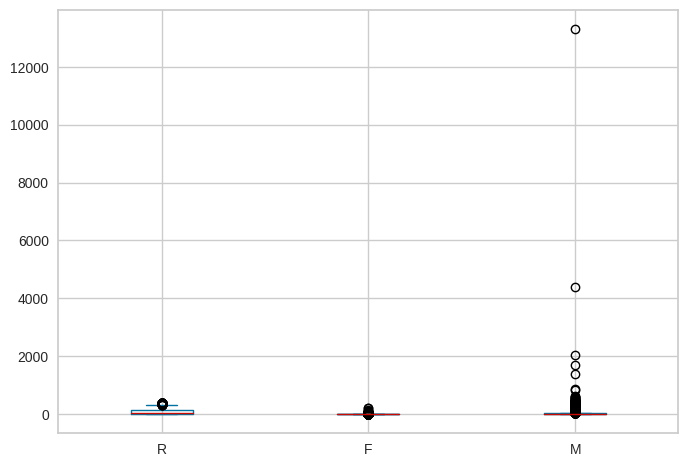

In [ ]:
df_rfm.plot.box();

##Os dados dessas colunas apresentam uma escala numéricas muito diferente uma da outra, achei necessário melhorar a visualização usando a função scale do scikit-learn.

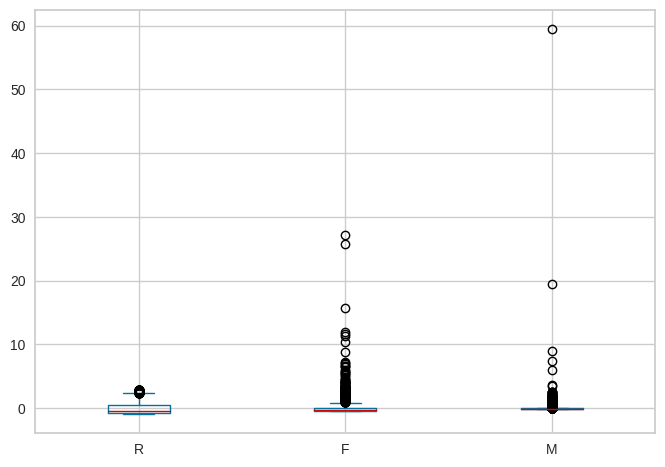

In [ ]:
df_rfm.apply(scale).plot.box();

In [ ]:
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.89562,-0.163703,59.461703


#Porem nao aparece nenhum outlier no analise.
#Não tem como tirar esse outlier.

##Para tratar os outliers restantes, optou-se por fazer uma normatização utilizando uma função de pré-processamento de dados da biblioteca scikit-learn, a chamada PowerTransformer. Esta função irá transformar os dados de tal forma a estabelecer distribuições normais em cada coluna, ou seja, com média próxima de zero e desvio padrão próximo de 1.

##Definindo o transformador.

In [ ]:
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [ ]:
df_rfm = df_rfm.drop(15098)

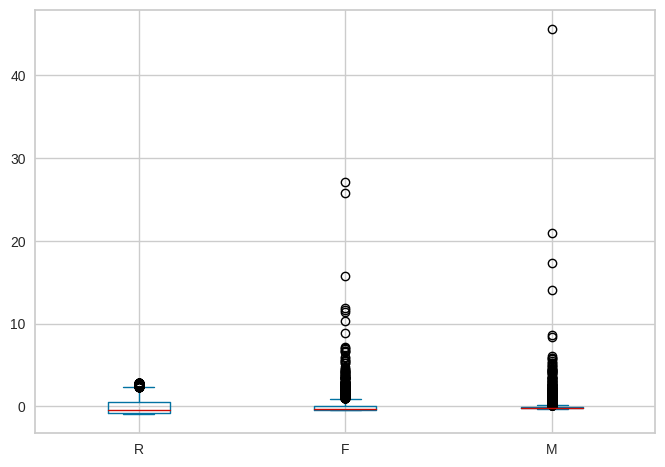

In [ ]:
df_rfm.apply(scale).plot.box();

#Transfomando os dados de RFM

In [ ]:
scaler = PowerTransformer()

In [ ]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index = df_rfm.index, columns = df_rfm.columns)
df_rfm_scaled

,R,F,M
CustomerID,,,
12347,-1.845581,1.204090,0.412162
12348,0.291572,0.662750,1.358365
12349,-0.680383,-1.156240,0.431541
12350,1.574383,-1.156240,0.189600
12352,-0.256935,1.311929,0.663105
...,...,...,...
18280,1.464211,-1.156240,0.084048
18281,1.050146,-1.156240,-0.499859
18282,-1.183052,-0.193781,-0.166127


##Plotando o Gráfico Boxplot dos dados já transformados

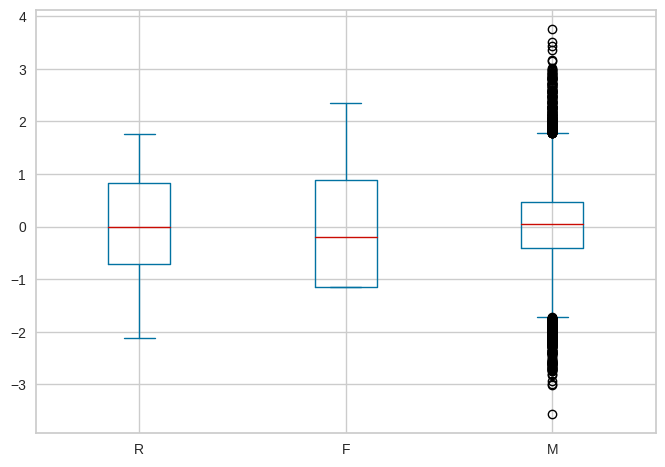

In [ ]:
df_rfm_scaled.plot.box();

##Agora ja os dados estão normalizados. As colunas RFM nao apresenta mais outliers, nao tem mais nenhum caso extremo. iremos partir para a modelagem utilizando o ultimo data frame.

#Modelling

##O modelo KMeans será usado para clusterizar os clientes. O número ideal de clusters será determinado pelo método do cotovelo, que avalia a variância dos resultados para diferentes quantidades de clusters.

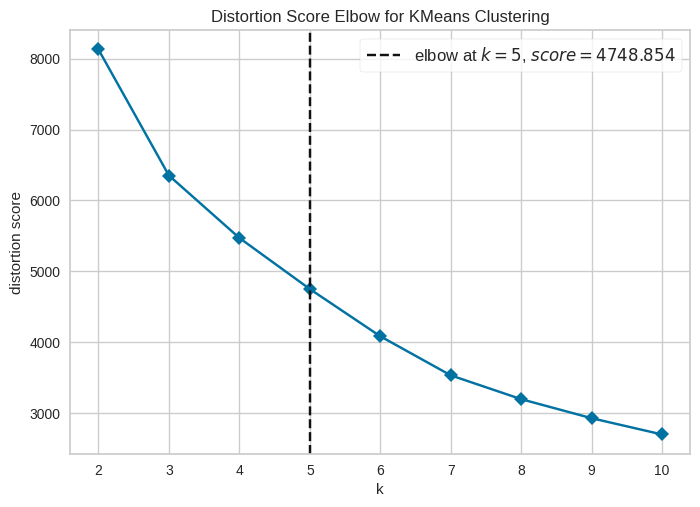

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init=10), timings=False)

In [ ]:
kelbow_visualizer(KMeans(n_init = 10), df_rfm_scaled, k = 10, timings = False)

##Avaliando agora o comportamento das métricas de Silhouette, Davies Bouldin e Calinski Harabasz conforme a variação dos números de cluster.

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters = k, n_init = 10, random_state = 0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8129.555674,0.340380,1.164130,2587.599933
3,6350.993782,0.334173,1.097599,2261.620084
4,5469.786081,0.273194,1.216533,1982.573888
5,4748.890178,0.280983,1.136098,1876.376386
6,4082.595435,0.293121,1.009941,1886.829735
7,3531.011044,0.303804,0.979029,1930.101150
8,3194.518605,0.305806,1.004856,1893.280366
9,2925.892449,0.298580,0.982250,1857.861865
10,2696.011433,0.301728,0.987768,1832.773801


#Visualizando os scores de Silhouette oara cada um dos 3 grupos.

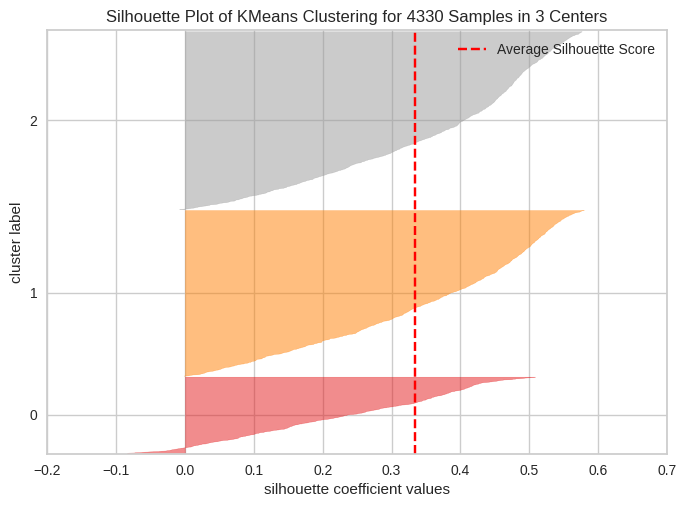

In [ ]:
silhouette_visualizer(KMeans(n_clusters = 3, n_init = 10), df_rfm_scaled);

##O grupo 2 é o que apresenta valores menores de silhouette score, mas no geral todos os 3 grupos tem resultados muito parecidos, não havendo grande discrepância entre um e outro.

##Portanto, com k=3, o modelo de KMeans foi treinado e posteriormente plotou-se um gráfico 3D utilizando a biblioteca plotly importada anteriormente com os resultados calculados pelo modelo.

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 10)
kmeans_labels = kmeans.fit_predict(df_rfm_scaled)

In [ ]:
px.scatter_3d(df_rfm, x='R', y='F', z='M', color = kmeans_labels.astype(str), template = 'plotly_dark')

##Percebe-se uma divisão dos 3 grupos, um grupo verde com Frequência e ticket médio bem próximo de zero, outro grupo vermelho com frequência próxima de zero, mas com ticket médio e recência variados e por último o grupo roxo com recência próxima de zero mas ticket médio e frequência variados.

##Para analisar os 3 em separados, de forma mais clara, plotou-se o gráfico abaixo utilizando os centroides calculados pelo modelo para cada um dos 3 grupos.

#Definição do Data Frame com os centroides

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_scaled.columns)
centers

,R,F,M
0,0.736339,-0.747251,0.371344
1,-0.036329,-0.236769,-1.489390
2,-0.773487,0.910567,0.285237


##Plotando a figura com os 3 gráficos, um para cada cluster,

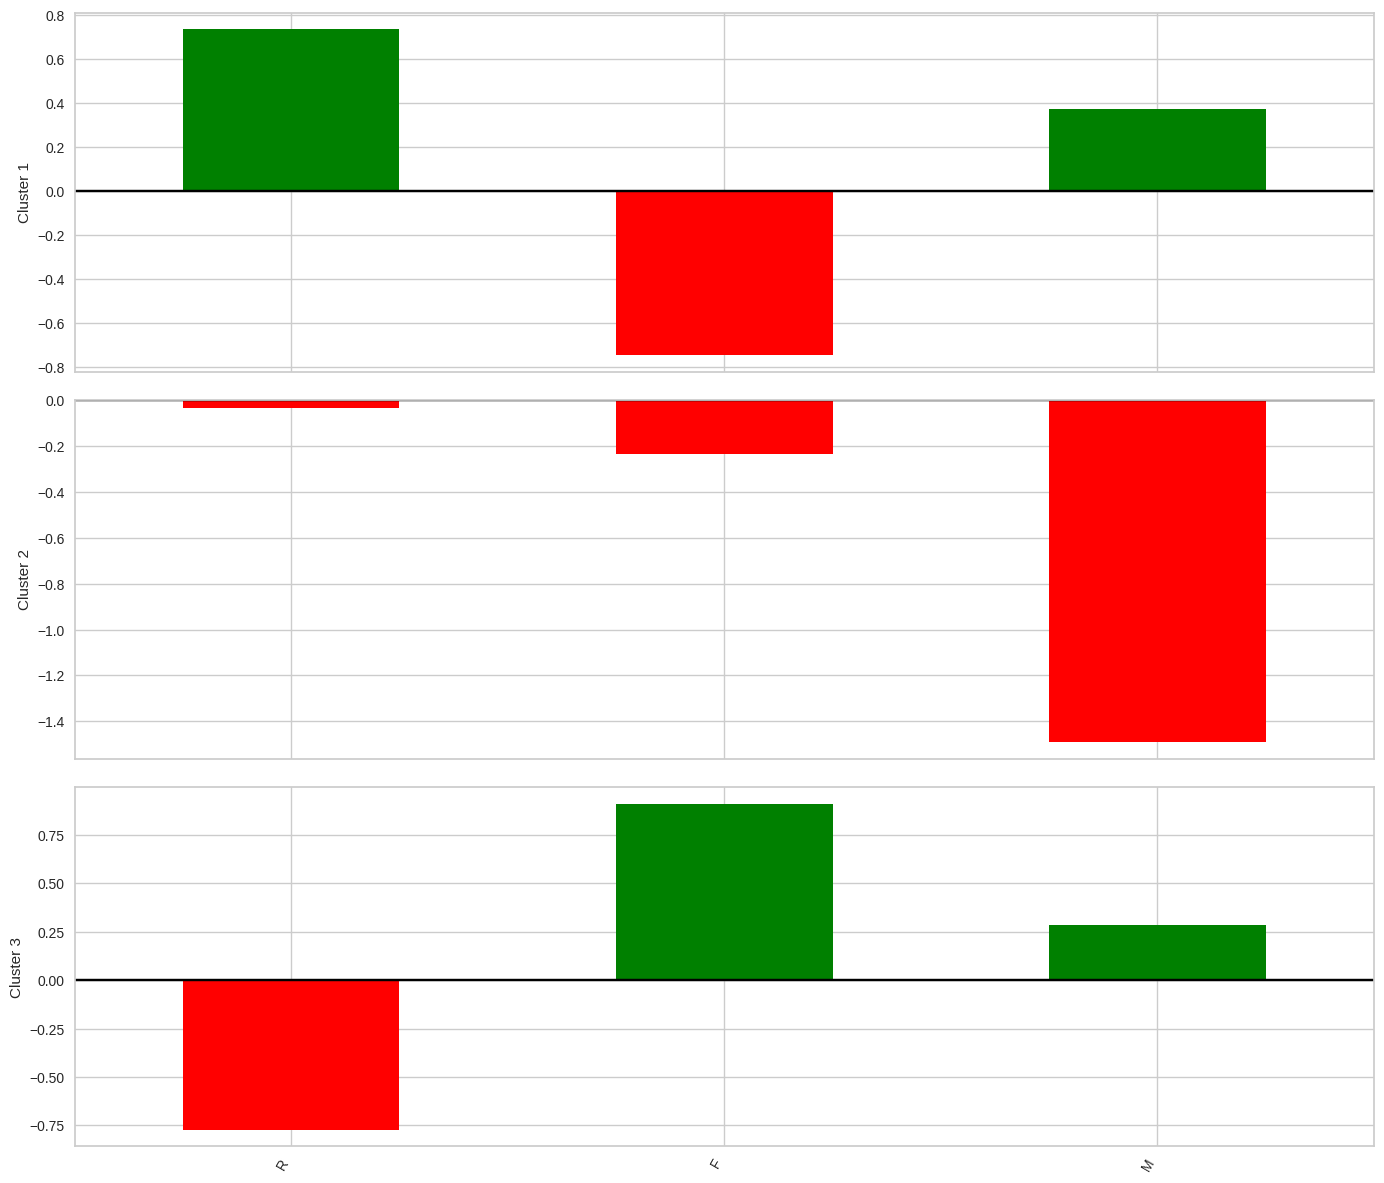

In [ ]:
fig, axes = plt.subplots(nrows = 3, figsize = (14,12), sharex = True)

for i, ax in enumerate(axes):
    center = centers.loc[i,:]

    colors = ['green' if l > 0 else 'red' for l in center]

    center.plot.bar(ax = ax, color = colors)

    ax.set_ylabel(f'Cluster {i+1}')

    ax.axhline(color = 'black')

plt.xticks(rotation = 60, ha = 'right')

plt.tight_layout()

plt.show()

#Avaliando os gráficos acima, podemos organizar as informações de forma mais concisa.

##Cluster 1:
###Este grupo apresenta o maior índice de Recência e a menor Frequência dentre os três grupos. São clientes que compraram pouquíssimos produtos no e-commerce e não realizam compras há um bom tempo. Podemos classificá-los como clientes “churn”.
##Cluster 2:
### Aqui temos o menor valor de Recência, indicando que são clientes que realizaram compras muito recentemente. Além disso, eles têm a maior frequência, o que sugere que são clientes fiéis que compram há bastante tempo no e-commerce, com um ticket médio relativamente bom. Poderíamos chamá-los de “Grupo VIP” ou “Fidelidade”.
##Cluster 3:
###Este grupo possui Recência relativamente baixa, frequência também baixa e o ticket médio mais baixo dentre os três grupos. São clientes que compram pouco e há pouco tempo, optando por produtos mais baratos. Podemos concluir que se trata de um grupo de clientes mais novos.


#Aqui estão algumas sugestões de ações específicas para cada grupo:

##Cluster 1 (Clientes “Churn”):
###Disparar e-mails com novas promoções e produtos para tentar resgatar esses clientes.
###Realizar um estudo de avaliação dos produtos, separando aqueles com pior rating médio dentro deste grupo. Investigar os motivos pelos quais eles pararam de comprar no e-commerce.
##Cluster 2 (Grupo VIP/Fidelidade):
###Oferecer benefícios como cartões fidelidade, pontos de vantagem e acesso a descontos exclusivos. Fidelizá-los ainda mais para aumentar o ticket médio geral do grupo e evitar a perda para possíveis concorrentes.
##Cluster 3:
###Este grupo possui Recência relativamente baixa, frequência também baixa e o ticket médio mais baixo dentre os três grupos. São clientes que compram pouco e recentemente, optando por produtos mais baratos. Podemos concluir que se trata de um grupo de clientes mais novos.